# 학습 내용
- 1.1 Pytorch Basic - ANN(단층 레이어) <-----
- 1.2 Pytorch MNIST - ANN(단층 레이어)
- 1.3 Pytorch MNIST - DNN(다층 레이어)
- 1.4 Pytorch MNIST - 나만의 모델 만들기

# 1.1 Pytorch Basic - ANN Regression
 - 이번 실습에서는 Pytorch를 이용하여 1차함수를 예측하는 모델을 만들고, 학습하여 성능을 평가한다.
 
 [목차]
 1.1.1 데이터셋 준비
 
 1.1.2 PyTorch 모델링
 
 1.1.3 모델 학습 + 추이 확인
 
 1.1.4 모델 사용하기
 
 1.1.5 모델의 정확도 확인
 

### 연산작업에 GPU 사용 가능여부 확인

In [2]:
# 코딩 타임(토치의 version과 사용 가능여부 확인)
import torch
print('torch version: {}'.format(torch.__version__))

if torch.cuda.is_available() == True:
    device = 'cuda:0'
    print('현재 가상환경 GPU 사용 가능상태')
else:
    device = 'cpu'
    print('GPU 사용 불가능 상태')


##########

torch version: 2.0.0
GPU 사용 불가능 상태


In [3]:
def seed(seed = 1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed() # 시드 고정

## 1.1.1데이터셋 준비

 - y = weight * x + bias
 - y = 4.56x + 7.89라는 식을 선형 회귀 모델에 학습시킨다
 - 10,000개의 x와 y세트를 [y = 4.56x + 7.89]이 성립하게 제작하여 모델에 학습시키며 x와 y의 관계를 학습하여 weight와 bias를 맞춘다

x: tensor([[0.2898],
        [4.0190],
        [2.5984],
        ...,
        [2.9740],
        [3.7569],
        [2.1046]])

y: tensor([[ 9.2115],
        [26.2166],
        [19.7389],
        ...,
        [21.4514],
        [25.0217],
        [17.4871]])



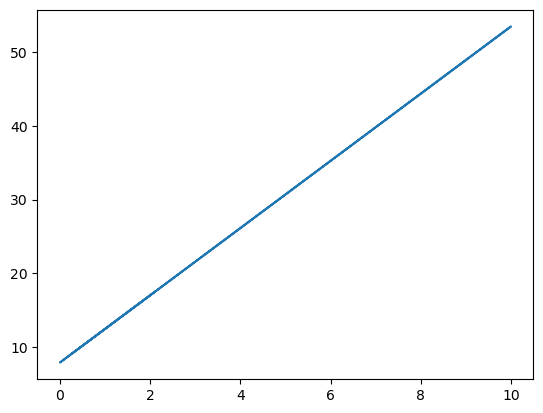

In [5]:
seed() # 시드 고정
# 코딩 타임(weight와 bias를 선언하고, x와 y의 세트를 만들기) - 1분

gt_w = 4.56
gt_b = 7.89

x = torch.rand(10000, 1) * 10 # 0과 10 사이의 값 10000개를 랜덤하게 만든다.
y = (gt_w * x) + gt_b

##########

print('x: {}\n'.format(x))
print('y: {}\n'.format(y))

import matplotlib.pyplot as plt
plt.plot(x,y)

## 1.1.2 Pytorch 모델링
 - 모델 선언: model에 Pytorch에서 제공하는 Linear 선형 회귀 모델 생성
 - Loss Function: MSE 사용
 - 옵티마이저: SGD를 사용
 - Learning Rate: 0.01로 설정
 - Epochs = 3,000으로 설정
 - Patience: 30번의 epoch 연속으로 모델 학습에 발전이 없으면 학습을 중지

### 모델 선언

In [6]:
seed() # 시드 고정

###PyTorch로 선언한 선형 회귀 모델!!###
model = torch.nn.Linear(in_features = 1, out_features = 1) 

import torch.optim as optim
criterion = torch.nn.MSELoss() # 손실 함수
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #옵티마이저를 SGD로 설정하고, Learning Rate는 0.01로 지정

epochs = 3000 # 최대 epoch를 지정한다(Early Stopping 기능으로 인해 중간에 멈춤)
patience = 30 # Early Stopping기능으로 작동할 '참을성' 설정. n번 연속으로 학습에 변화가 없으면 학습을 중지한다

### 모델 학습

In [7]:
seed() # 시드 고정
early_stop_cnt, weight_flag, bias_flag = 0, 0, 0 # early stopping을 위해 비교로 사용되는 변수들 초기화
losses = [] # 학습 추이에 사용되는 리스트 초기화

for epoch in range(epochs + 1):
    
    # 코딩타임(모델을 학습하는 알고리즘 제작) - 3분
    
    y_pred = model(x)
    loss = criterion(y_pred, y) # 실제 y와 예측된 y의 차이를 비교하여 Loss 산정
    losses.append(loss.item()) # 나중에 그래프로 출력하기 위해서 빈 리스트에 loss 추가(item()을 사용하면 안에 있는 숫자만 들어감)
    optimizer.zero_grad() # 매 학습시 누적된 그래디언트를 초기화
    loss.backward() # loss값을 기준으로 back propergation시킨다
    optimizer.step() # back propergation으로 알아낸 값 기준으로 learning rate만큼 내려간다
    
    ##########
    
    w = float(model.weight[0][0]) # 예측된 weight를 실수로 추출
    b = float(model.bias[0]) # 예측된 bias를 실수로 추출
 
    # 1 epoch마다 학습의 추이를 출력하도록
    print('Epoch: {:5} | Ground Truth 식: y = {}x + {}  |  예측된 식: y = {}x + {}\
    '.format(epoch, gt_w, gt_b, round(w, 4), round(b, 4)))
    
    # 직전 epoch의 결과와 현재 예측된 결과의 비교에서 발전이 있는지 판단
    if w == weight_flag and b == bias_flag: 
        early_stop_cnt += 1
    else:
        early_stop_cnt = 0
    
    # 연속적으로 모델의 예측 성능이 같으면 early stopping이 작동한다
    if early_stop_cnt >= patience:
        print('Early Stopping이 작동되었습니다. 현재 epoch: {}'.format(epoch))
        break     
    
    # 다음 epoch에서 모델의 발전을 판단하기 위하여 예측된 weight랑 bias 저장
    weight_flag = w
    bias_flag = b

Epoch:     0 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 3.5055x + 0.5143    
Epoch:     1 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.939x + 0.767    
Epoch:     2 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.3987x + 0.8717    
Epoch:     3 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5437x + 0.9284    
Epoch:     4 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5871x + 0.9695    
Epoch:     5 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5977x + 1.0055    
Epoch:     6 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5977x + 1.0396    
Epoch:     7 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5943x + 1.0731    
Epoch:     8 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5898x + 1.1063    
Epoch:     9 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.585x + 1.1393    
Epoch:    10 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.58x + 1.1721    
Epoch:    11 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 5.5751x + 1.2047  

Epoch:  1971 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1972 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1973 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1974 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1975 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1976 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1977 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1978 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1979 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1980 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1981 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8895    
Epoch:  1982 | Ground Truth 식: y = 4.56x + 7.89  |  예측된 식: y = 4.5601x + 7.8

## 1.1.3 모델 평가하기

- 학습 극 초반에 로스가 너무 커서, 1 epoch부터 그래프를 그리면 시각화가 제대로 안됨
- 따라서 10 epoch부터 볼 수 있도록 조건을 수정

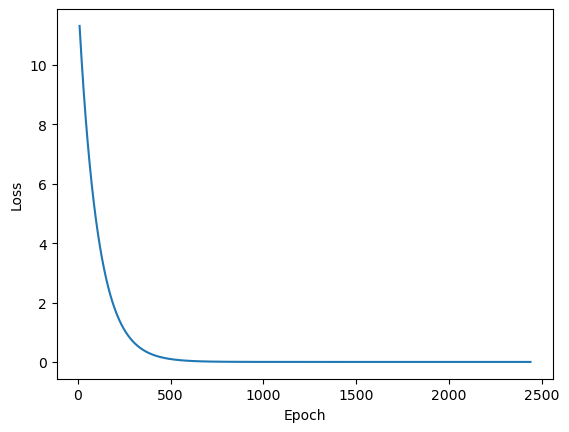

In [13]:
# 코딩타임(학습 추이 확인 - epoch에 따른 loss를 그래프로 출력) - 1분
plt.plot(range(10, epoch+1, 1), losses[10:])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
##########

## 1.1.4 모델 사용하기
 - 모델은 계산식을 모르고 x와 y의 관계만 학습했는데, 맞는 결과를 낼 수 있을까?


In [14]:
input = 123

# 코딩 타임(x에 123을 넣고 y로 어떠한 값이 나오는지 확인) - 3분

input = float(input) # 실수로 변경
input = [input] # 리스트 안에 넣기
input = torch.tensor(input) # Tensor 형식으로 변경

print('input 모양: {}'.format(input))

output = model(input) # 모델에 넣고 결과를 출력
output = output.item() # Tensor 형식의 결과에서 숫자만 추출

ground_truth = input.item() * gt_w + gt_b
print('Ground Truth: {}'.format(ground_truth))
print('Predicted Y: {}'.format(output))

##########

input 모양: tensor([123.])
Ground Truth: 568.77
Predicted Y: 568.7709350585938


- 인공신경망에게 수식을 알려주지 않고 다량의 결과 데이터셋을 학습시켜 주었고
- loss를 줄이는 방향으로 역전파 학습을 통하여 역으로 수식의 weight와 bias를 도출한것 처럼 결과가 나옴
- 도출된 수식은 실제 처음에 지정한 수식으로 수렴함을 알 수 있으며,
- 하이퍼 파라미터(Loss, Optimizer, Epoch, Early Stopping Patience, Learning Rate)조정을 통하여 정확도를 더 향상시킬 수 있다

# ============================================================

- 1.1 Pytorch Basic - ANN(단층 레이어)
- 1.2 Pytorch MNIST - ANN(단층 레이어) <-----
- 1.3 Pytorch MNIST - DNN(다층 레이어)
- 1.4 Pytorch MNIST - 나만의 모델 만들기

# 1.2 Pytorch MNIST - ANN(단층 레이어)
 - 이번 실습에서는 Pytorch를 이용하여 로지스틱 회귀 모델을 구성하고 MNIST 데이터셋을 분류하도록 학습시킨다.
 
 [목차]
 
 1.2.1 필요 라이브러리 불러오기
 
 1.2.2 Batch Size 설정
 
 1.2.3 데이터 로드 & 전처리
 
 1.2.4 모델 선언
 
 1.2.5 학습에 필요한 기능 제작
 
 1.2.6 모델의 정확도 도출

## 1.2.1 Batch Size 설정
- 데이터를 Data Loader에 넣어주기 위해 사전에 Batch Size를 정해준다

In [15]:
# 배치 사이즈
batch_size = 32

## 1.2.2 데이터 로드 & 전처리
- MNIST 데이터를 다운로드 받는다.
- Train, Validation, test 데이터를 분할해준다.

In [19]:
seed() # 시드 고정

import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torchvision import datasets
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(1.0,))])

# 코딩 타임(MNIST 데이터 다운로드 후 3분할) - 3분

train_data = datasets.MNIST(root = './', train = True, download = True, transform = mnist_transform)
train_data, valid_data = random_split(train_data, [54000, 6000])
test_data = datasets.MNIST(root = './', train = False, download = True, transform = mnist_transform)

##########

## 1.2.3 준비한 Dataset 길이 확인
- Train / Validation / Test 데이터가 제대로 나뉘었는지 길이를 확인

In [20]:
print('Train 길이: {}'.format(len(train_data)))
print('Valid 길이: {}'.format(len(valid_data)))
print('Test  길이: {}'.format(len(test_data)))

Train 길이: 54000
Valid 길이: 6000
Test  길이: 10000


- 데이터를 시각화하여 확인한다
- 숫자 0 ~ 9로 구성된 MNIST 데이터는 28 * 28 픽셀로 이루어졌다
- 각 데이터마다 라벨이 존재한다

Content of Y (Label, type = <class 'int'>) = 0
Shape of X(Data, type = <class 'torch.Tensor'> = torch.Size([1, 28, 28]))


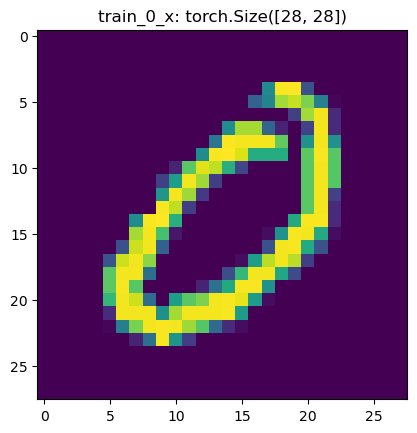

In [21]:
seed() # 시드 고정
train_0_x, train_0_y = train_data[1] # x가 사진, y는 라벨 데이터
print('Content of Y (Label, type = {}) = {}'.format(type(train_0_y), train_0_y))
print('Shape of X(Data, type = {} = {})'.format(type(train_0_x), train_0_x.shape))

plt.figure(1)
plt.imshow(train_0_x.squeeze())
plt.title('train_0_x: {}'.format(train_0_x.squeeze().shape))
plt.show()

- 데이터 로더를 만든다
- 데이터 로더가 있어야 모델에 데이터를 넣을 수 있다
- 데이터 로더를 만들고, Train 부분을 시각화하여 확인해본다

In [22]:
seed() # 시드 고정
from torch.utils.data import DataLoader

# Train / Validation / Test 셋에 대한 데이터 로더 만들기
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_data, batch_size=len(valid_data), pin_memory=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), pin_memory=True)

# Train 부분의 데이터 로더를 확인 해보기
train_enumerator = enumerate(train_loader) # train_loader의 값과 순서를 추출

In [23]:
seed() # 시드 고정
ex_batch_idx, (ex_data, ex_label) = next(train_enumerator)

print('순서: / X모양: {} / Y모양: {}'.format(ex_batch_idx, ex_data.shape, ex_label.shape))
print('Y 0 ~ {} 출력: {}'.format(batch_size, ex_label))

순서: / X모양: 0 / Y모양: torch.Size([32, 1, 28, 28])
Y 0 ~ 32 출력: tensor([5, 9, 7, 4, 5, 5, 7, 0, 6, 0, 7, 9, 3, 0, 8, 2, 5, 5, 0, 9, 3, 9, 7, 9,
        2, 1, 1, 8, 3, 3, 6, 5])


## 1.2.4 학습에 필요한 기능 제작
- 모델 학습에 필요한 기능들(학습, 시각화, 결과 분석)등을 위해 필요한 기능들을 선언한다

### 모델 선언
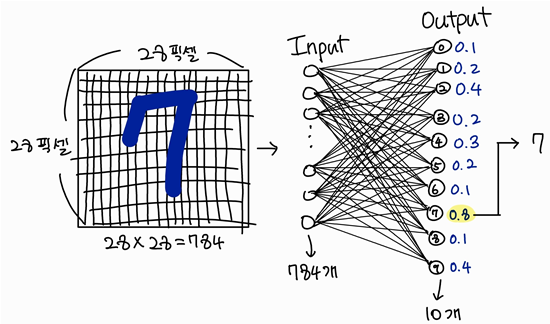

In [24]:
# 하이퍼 파라미터
maximum_epoch = 10 # 최대 epoch
learning_rate = 0.01 # Learning Rate

import torch.nn as nn
class ANN(nn.Module):
    def __init__(self, in_features, out_features):
        super(ANN, self).__init__()
        
        # 코딩 타임(784개의 입력 -> 10개의 출력 단층 레이어 로직 만들기) - 3분
        
        self.fc1 = nn.Linear(in_features, out_features) # 입력 784개의 뉴런이 10개로 분류된다
        
        ##########
        
    def forward(self, x):
        # 코딩 타임(위에서 만든 로직을 forward로 선언해주기) - 위랑 포함하여 3분
        
        x = self.fc1(x)
        
        ##########
        return x
    
# Model structure check
from torchsummary import summary as Summary
Summary(ANN(784, 10).to(device),(0, 0, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 0, 0, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


## 학습에 사용되는 함수
 - 초기화
 - 모델 구동
 - 학습 추이

### 초기화

In [25]:
# Model
from torch.optim import SGD
def init_model(_net):
    global net, loss_fn, optim # 모델, loss function, 옵티마이저 글로벌 변수로 선언
    net = _net.to(device) # 모델을 GPU에서 돌릴 수 있도록
    loss_fn = nn.CrossEntropyLoss() # Loss Function을 설정
    optim = SGD(net.parameters(), lr=learning_rate) # 옵티마이저 설정

# Epoch
def init_epoch():
    global epoch_cnt
    epoch_cnt = 0
    
# Logging
def init_log():
    # 모든 Log를 초기화
    global log_stack, iter_log, tloss_log, tacc_log, vloss_log, vacc_log, time_log
    iter_log, tloss_log, tacc_log, vloss_log, vacc_log = [], [], [], [], []
    time_log, log_stack = [], []

### 모델 구동

In [26]:
import numpy as np
def epoch(data_loader):
    global epoch_cnt
    iter_loss, iter_acc = [], [] # 학습 추이 출력을 위한 리스트 선언
    last_grad_performed = False # train 상황에서만 epoch 카운터를 올리기 위한 flag

    # Mini-batch iterations
    for _data, _label in data_loader:
        data, label = _data.view([len(_data), -1]).to(device), _label.to(device)

# 코딩 타임(학습 알고리즘 1 ~ 5 채워보기) - 3분

        # 1. Feed-forward
        result = net(data) # 1 배치에 대한 모든 class 별로의 확률값
        _, out = torch.max(result, 1) # 위의 확률값에서 최댓값을 뽑아서 예측된 숫자로 변환

        # 2. Calculate loss
        loss = loss_fn(result, label) # 모델의 예측과 GT를 비교하여 Loss를 산출
        iter_loss.append(loss.item()) # 산출된 Loss를 기록

        # 3. Backward propagation(train mode 에서만)
        if result.requires_grad: # Validation 검증을 거칠 때 역전파 학습을 안하도록 if문 존재
            optim.zero_grad() # 미분을 통해 얻은 기울기를 초기화. 그래야 다음 에폭에서 사용
            loss.backward() # back Propagation을 진행
            optim.step() # 경사 하강을 진행
            last_grad_performed = True # 1 epoch 완료됨을 알림
            
        # 4. Calculate accuracy
        acc_partial = (out == label).float().sum() # 예측값이랑 GT랑 같은 개수를 구함
        acc_partial = acc_partial / len(label) # [개수 / 총량] 을 함으로서 정확도를 구함
        iter_acc.append(acc_partial.item()) # 산출된 Acc.를 기록    
        
##########

    # 1 epoch이 끝나면 카운터를 1개 올려준다(train에서만 적용)
    if last_grad_performed:
        epoch_cnt += 1

    return np.average(iter_loss), np.average(iter_acc) # 여러 iteration으로 쌓인 Loss와 Acc.를 평균내어 반환

def epoch_not_finished():
    # 에폭이 끝남을 알리는 함수
    return epoch_cnt < maximum_epoch

### 학습 추이

In [27]:
def record_train_log(_tloss, _tacc, _time):
    # Train Log를 추가해준다
    time_log.append(_time)
    tloss_log.append(_tloss)
    tacc_log.append(_tacc)
    iter_log.append(epoch_cnt)

def record_valid_log(_vloss, _vacc):
    # Validation Log를 추가해준다
    vloss_log.append(_vloss)
    vacc_log.append(_vacc)

def last(log_list):
    # 리스트 안의 마지막 숫자를 반환
    if len(log_list) > 0:
        return log_list[len(log_list) - 1]
    else:
        return -1

from IPython.display import clear_output
def print_log():    
    # 로그 프린트
    
    # 소숫점 3자리 수까지 조절
    train_loss = round(last(tloss_log), 3)
    train_acc = round(last(tacc_log), 3)
    val_loss = round(last(vloss_log), 3)
    val_acc = round(last(vacc_log), 3)
    time_spent = round(last(time_log), 3)
    
    log_str = 'Epoch: {:3} | T_Loss {:5} | T_acc {:5} | V_Loss {:5} | V_acc. {:5} | \
🕒 {:5}'.format(last(iter_log), train_loss, train_acc, val_loss, val_acc, time_spent)
    
    log_stack.append(log_str) # 프린트할 리스트에 추가
    clear_output(wait=True) # 출력물 모두 초기화
    
    for log_print in log_stack:
        print(log_print) # 매 에폭마다 추이를 출력

## 1.2.5 모델 학습

In [28]:
seed() # 시드 고정
# Training Initialization
init_model(ANN(len(train_0_x.view([-1])), 10)) # 입력 784개, 출력 10개
init_epoch() # 에폭의 카운터 초기화
init_log() # 로그 데이터 초기화

losses_train, losses_val = [], [] # 나중에 그래프 출력을 위해서 존재

# Training Iteration
import time
while epoch_not_finished():
    start_time = time.time() # 시간초 시작
    tloss, tacc = epoch(train_loader) # 모델에 학습 데이터 투입 후 loss, acc. 반환
    losses_train.append(tloss) # 나중에 그래프 출력을 위해 기록
    end_time = time.time() # 시간초 종료
    time_taken = end_time - start_time # 학습에 걸린 시간 확인
    record_train_log(tloss, tacc, time_taken) # 추이 출력을 위해 기록
    with torch.no_grad(): # 역전파 학습을 하지 말도록
        vloss, vacc = epoch(valid_loader) # Validation 검증 시간
        losses_val.append(vloss) # 나중에 그래프 출력을 위해 기록
        record_valid_log(vloss, vacc) # 추이 출력을 위해 기록
    print_log() # 로그를 프린트

print('\n Training completed!')

Epoch:   1 | T_Loss 0.783 | T_acc 0.824 | V_Loss 0.525 | V_acc. 0.861 | 🕒 3.018
Epoch:   2 | T_Loss 0.455 | T_acc 0.881 | V_Loss 0.441 | V_acc. 0.878 | 🕒 2.958
Epoch:   3 | T_Loss 0.402 | T_acc 0.891 | V_Loss 0.409 | V_acc. 0.884 | 🕒 2.929
Epoch:   4 | T_Loss 0.375 | T_acc 0.897 | V_Loss 0.389 | V_acc. 0.886 | 🕒  2.99
Epoch:   5 | T_Loss 0.358 | T_acc 0.901 | V_Loss 0.375 | V_acc. 0.891 | 🕒 2.928
Epoch:   6 | T_Loss 0.347 | T_acc 0.903 | V_Loss 0.366 | V_acc. 0.893 | 🕒 2.933
Epoch:   7 | T_Loss 0.338 | T_acc 0.906 | V_Loss 0.359 | V_acc. 0.896 | 🕒 3.055
Epoch:   8 | T_Loss 0.331 | T_acc 0.907 | V_Loss 0.353 | V_acc. 0.898 | 🕒 3.048
Epoch:   9 | T_Loss 0.325 | T_acc 0.909 | V_Loss 0.348 | V_acc. 0.899 | 🕒 2.993
Epoch:  10 | T_Loss  0.32 | T_acc  0.91 | V_Loss 0.345 | V_acc. 0.901 | 🕒 3.037

 Training completed!


### Train Loss와 Validation Loss가 학습에 따라 줄어드는 추이를 확인한다
- 위 셀에서 losses_train과 losses_val이라는 리스트에 loss들을 쌓아 놓았고, 이를 plot으로 그려본다

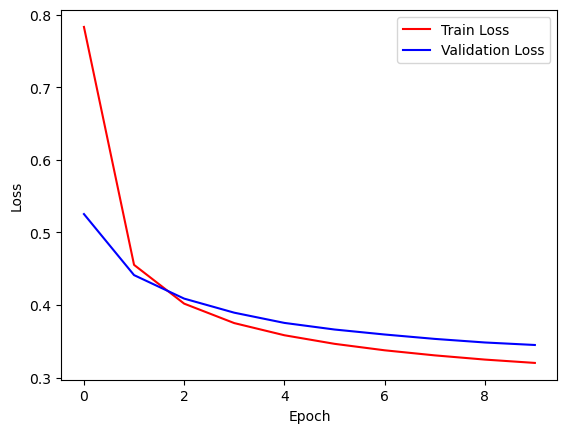

In [29]:
# 코딩 타임(plot으로 Train과 Validation loss를 출력하기

plt.plot(range(0, maximum_epoch, 1), losses_train, label = 'Train Loss', color = 'red')
plt.plot(range(0, maximum_epoch, 1), losses_val, label = 'Validation Loss', color = 'blue')

##########

plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

- epoch이 증가할 수록 train loss와 validation loss가 감소함과 동시에 accuracy가 상승함을 알 수 있다
- 정상적인 학습 방식이며, loss가 늘어나거나, acc가 감소하면 모델의 구조 및 하이퍼 파라미터를 변경해야 한다


## 1.2.6 모델의 정확도 도출

In [30]:
# 정확도 검증
with torch.no_grad():
    test_loss, test_acc = epoch(test_loader)
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

Test Acc.: 0.9139
Test Loss: 0.3085


# ============================================================

- 1.1 Pytorch Basic - ANN(단층 레이어)
- 1.2 Pytorch MNIST - ANN(단층 레이어) 
- 1.3 Pytorch MNIST - DNN(다층 레이어) <-----
- 1.4 Pytorch MNIST - 나만의 모델 만들기

# 1.3 Pytorch MNIST - MLP(Multi Layer Perceptron)
- 이번 실습에서는 다층 퍼셉트론(MLP)으로 이루어진 인공신경망 모델을 구성하여 MNIST 데이터셋을 분류하도록 학습시킨다
- 앞에서 배운 단층 퍼셉트론(ANN)과 이번 시간에 배운 다층 퍼셉트론(MLP)의 성능을 비교해본다

## 새로 배우는 DNN모델(MLP)
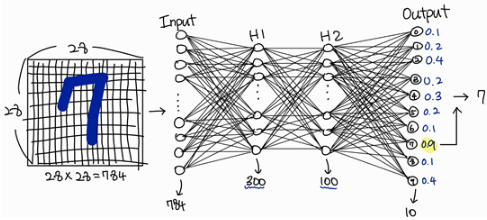

### 모델 선언
- 모델의 학습 구조는 이미 이전에 설계하였고, 모델의 아키텍쳐만 바꾸어 새로운 모델을 만들고 학습이 가능하다

In [31]:
# 하이퍼 파라미터
maximum_epoch = 10 # 최대 epoch
learning_rate = 0.01 # Learning Rate

class MLP(nn.Module):
    def __init__(self, in_features, out_features):
        super(MLP, self).__init__()
        layer = [300, 100]
        
        # 784 -> 300 -> 100 -> 10
        self.fc1 = nn.Linear(in_features, layer[0])
        self.act1 = nn.ReLU() # 사용되는 Activation Function은 Relu이다
        self.fc2 = nn.Linear(layer[0], layer[1])
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(layer[1], out_features)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        return x

# Model structure check
from torchsummary import summary as Summary
Summary(MLP(784, 10).to(device),(0, 0, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 0, 0, 300]         235,500
              ReLU-2            [-1, 0, 0, 300]               0
            Linear-3            [-1, 0, 0, 100]          30,100
              ReLU-4            [-1, 0, 0, 100]               0
            Linear-5             [-1, 0, 0, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.02
Estimated Total Size (MB): 1.02
----------------------------------------------------------------


### 모델 학습

In [32]:
seed() # 시드 고정
# Training Initialization
init_model(MLP(len(train_0_x.view([-1])), 10)) # 입력 784개, 출력 10개
init_epoch() # 에폭의 카운터 초기화
init_log() # 로그 데이터 초기화

losses_train, losses_val = [], [] # 나중에 그래프 출력을 위해서 존재

# Training Iteration
while epoch_not_finished():
    start_time = time.time() # 시간초 시작
    tloss, tacc = epoch(train_loader) # 모델에 학습 데이터 투입 후 loss, acc. 반환
    losses_train.append(tloss) # 나중에 그래프 출력을 위해 기록
    end_time = time.time() # 시간초 종료
    time_taken = end_time - start_time # 학습에 걸린 시간 확인
    record_train_log(tloss, tacc, time_taken) # 추이 출력을 위해 기록
    with torch.no_grad(): # 역전파 학습을 하지 말도록
        vloss, vacc = epoch(valid_loader) # Validation 검증 시간
        losses_val.append(vloss) # 나중에 그래프 출력을 위해 기록
        record_valid_log(vloss, vacc) # 추이 출력을 위해 기록
    print_log() # 로그를 프린트

print('\n Training completed!')

# 정확도 검증
with torch.no_grad():
    test_loss, test_acc = epoch(test_loader)
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

Epoch:   1 | T_Loss  1.12 | T_acc 0.699 | V_Loss 0.495 | V_acc.  0.85 | 🕒 3.594
Epoch:   2 | T_Loss 0.391 | T_acc 0.887 | V_Loss 0.368 | V_acc. 0.892 | 🕒 3.562
Epoch:   3 | T_Loss 0.325 | T_acc 0.906 | V_Loss 0.328 | V_acc. 0.904 | 🕒  3.78
Epoch:   4 | T_Loss 0.289 | T_acc 0.915 | V_Loss 0.293 | V_acc. 0.914 | 🕒 3.848
Epoch:   5 | T_Loss  0.26 | T_acc 0.923 | V_Loss 0.269 | V_acc. 0.921 | 🕒 3.989
Epoch:   6 | T_Loss 0.237 | T_acc  0.93 | V_Loss 0.257 | V_acc. 0.925 | 🕒 4.027
Epoch:   7 | T_Loss 0.215 | T_acc 0.938 | V_Loss 0.242 | V_acc. 0.928 | 🕒 4.007
Epoch:   8 | T_Loss 0.197 | T_acc 0.944 | V_Loss  0.22 | V_acc. 0.934 | 🕒 3.732
Epoch:   9 | T_Loss  0.18 | T_acc 0.948 | V_Loss 0.203 | V_acc. 0.941 | 🕒 3.682
Epoch:  10 | T_Loss 0.165 | T_acc 0.952 | V_Loss 0.193 | V_acc. 0.943 | 🕒 3.526

 Training completed!
Test Acc.: 0.9503
Test Loss: 0.1648


### 모델 저장하고 불러오기

In [33]:
# 코딩타임(모델 저장하기) - 1분

torch.save(net.state_dict(), './model.pth') # 모델 저장

##########

In [34]:
# 코딩타임(저장한 모델을 로드 하기)

net = MLP(in_features = 784, out_features = 10).to(device)
net.load_state_dict(torch.load('./model.pth'))


##########

<All keys matched successfully>

## ANN과 DNN의 성능 비교 & 생각해보기
- 단층 레이어 모델과 다층 레이어 모델의 성능 비교시 다층 레이어(MLP)가 더 우수하다


- Hidden Layer수를 무작정 많이 늘리면 성능이 더 좋아질까?
- Hidden Layer가 지나치게 많으면 연산량이 너무 많아지지는 않을까?
- 모델이 최고의 성능을 내려면 어떻게 해야 할까?

# ======================================================